In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = "ASIANPAINT.NS"
start = "2018-01-01"
end = "2023-10-30"

In [3]:
df = yf.download(ticker, start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1163.000000,1165.000000,1138.099976,1143.650024,1096.119263,591349
2018-01-02,1146.000000,1150.000000,1134.050049,1142.750000,1095.256836,516171
2018-01-03,1149.000000,1149.000000,1135.300049,1141.900024,1094.442261,593809
2018-01-04,1149.000000,1178.000000,1145.900024,1172.050049,1123.339111,729965
2018-01-05,1178.000000,1192.000000,1167.449951,1185.250000,1135.990601,1151320
...,...,...,...,...,...,...
2023-10-20,3092.500000,3115.100098,3064.550049,3105.850098,3100.437744,711434
2023-10-23,3096.050049,3108.899902,3064.000000,3072.000000,3066.646729,374476
2023-10-25,3093.399902,3108.000000,3052.000000,3060.800049,3055.466309,669290


In [4]:
data = df['Close']
print(data.values)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))
data

[1143.65002441 1142.75       1141.90002441 ... 3060.80004883 2960.30004883
 2955.14990234]


array([[0.01699198],
       [0.01662829],
       [0.01628482],
       ...,
       [0.79169193],
       [0.75108095],
       [0.74899983]])

In [5]:
training_data_len = int(len(data) * 0.8)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1151, 288)

In [6]:
print("Training Data Type:", type(training_data))
print("Training Data Size:", training_data.size)
print("Training Data Shape", training_data.shape) 
print("Training Data Dimension:", training_data.ndim)
print("Training Data:",training_data)
# print("Testing Data:", testing_data)

Training Data Type: <class 'numpy.ndarray'>
Training Data Size: 1151
Training Data Shape (1151, 1)
Training Data Dimension: 2
Training Data: [[0.01699198]
 [0.01662829]
 [0.01628482]
 ...
 [0.91360567]
 [0.89786641]
 [0.90582695]]


In [7]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 8s 17ms/step - loss: 0.2281
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1852
Epoch 3/200
6/6 [==============================] - 0s 17ms/step - loss: 0.1426
Epoch 4/200
6/6 [==============================] - 0s 16ms/step - loss: 0.1046
Epoch 5/200
6/6 [==============================] - 0s 19ms/step - loss: 0.0761
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0720
Epoch 7/200
6/6 [==============================] - 0s 23ms/step - loss: 0.0686
Epoch 8/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0565
Epoch 9/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0465
Epoch 10/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0343
Epoch 11/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0211
Epoch 12/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0103
Epoch 13/200
6/6 [==============================]

6/6 [==============================] - 0s 12ms/step - loss: 2.4171e-04
Epoch 100/200
6/6 [==============================] - 0s 10ms/step - loss: 2.4116e-04
Epoch 101/200
6/6 [==============================] - 0s 11ms/step - loss: 2.4088e-04
Epoch 102/200
6/6 [==============================] - 0s 10ms/step - loss: 2.4069e-04
Epoch 103/200
6/6 [==============================] - 0s 11ms/step - loss: 2.4097e-04
Epoch 104/200
6/6 [==============================] - 0s 10ms/step - loss: 2.4021e-04
Epoch 105/200
6/6 [==============================] - 0s 11ms/step - loss: 2.4203e-04
Epoch 106/200
6/6 [==============================] - 0s 11ms/step - loss: 2.4148e-04
Epoch 107/200
6/6 [==============================] - 0s 11ms/step - loss: 2.4029e-04
Epoch 108/200
6/6 [==============================] - 0s 11ms/step - loss: 2.4107e-04
Epoch 109/200
6/6 [==============================] - 0s 13ms/step - loss: 2.4343e-04
Epoch 110/200
6/6 [==============================] - 0s 22ms/step - loss: 2.454

6/6 [==============================] - 0s 11ms/step - loss: 2.4335e-04
Epoch 196/200
6/6 [==============================] - 0s 11ms/step - loss: 2.4748e-04
Epoch 197/200
6/6 [==============================] - 0s 10ms/step - loss: 2.5622e-04
Epoch 198/200
6/6 [==============================] - 0s 10ms/step - loss: 2.4297e-04
Epoch 199/200
6/6 [==============================] - 0s 10ms/step - loss: 2.4003e-04
Epoch 200/200
6/6 [==============================] - 0s 10ms/step - loss: 2.4244e-04


In [9]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [10]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [11]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 25.457548403532595
Root Mean Squared Error (RMSE): 38.23465991108253


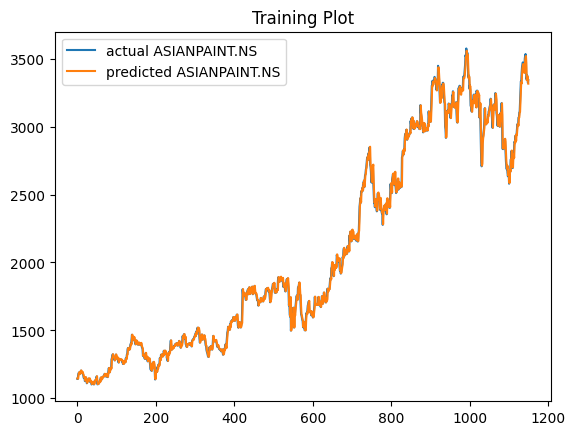

In [12]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 26.14859997686196
Root Mean Squared Error (RMSE): 35.91033964994939


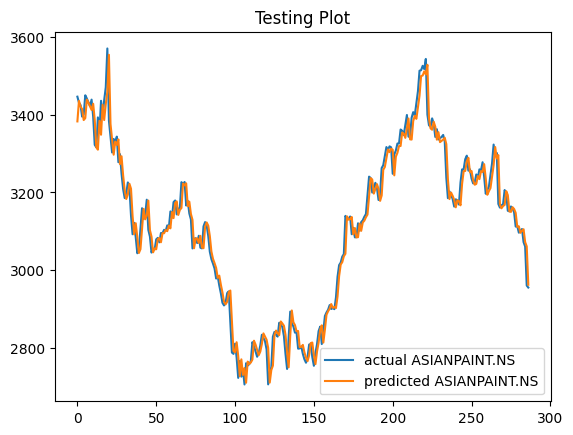

In [13]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

In [14]:
y_test[-1]

2955.14990234375

In [15]:
pred[-1]

array([2962.353], dtype=float32)

In [16]:
future_start="2023-11-01"
future_end="2023-12-10"

future_data = yf.download(ticker, start=future_start, end=future_end)
future_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,2997.949951,3008.899902,2930.000000,2934.550049,2929.436279,1029990
2023-11-02,2961.050049,2962.000000,2934.000000,2955.399902,2950.249756,900125
2023-11-03,2957.000000,2982.899902,2942.000000,2977.850098,2977.850098,715997
2023-11-06,2998.000000,3034.050049,2983.850098,3029.300049,3029.300049,620959
2023-11-07,3029.300049,3038.949951,3002.199951,3033.350098,3033.350098,757998
2023-11-08,3058.000000,3098.949951,3046.199951,3095.250000,3095.250000,783400
2023-11-09,3100.000000,3111.399902,3074.050049,3080.199951,3080.199951,849702
2023-11-10,3070.000000,3085.000000,3040.100098,3076.449951,3076.449951,364232
2023-11-13,3098.000000,3098.000000,3065.000000,3085.600098,3085.600098,405941


In [17]:
future_data = np.array(future_data['Close'])
len(future_data)

26

In [18]:
print(type(future_data))
# x = future_data.reshape(-1, 1)
# print(x)
# scaler.transform(x)

<class 'numpy.ndarray'>


In [19]:
def predict_future(days, last_input, future_data):
    Output = []
    i = 0
    temp = scaler.transform(future_data.reshape(-1, 1))
    
    while(i<days):
        if(len(last_input)>past_values):
            last_input = last_input[1:]
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            last_input = last_input[1:]
            Output.extend(res.tolist())
            i=i+1
        else:
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            Output.extend(res.tolist())
            i=i+1
        
    Output = scaler.inverse_transform(Output)
    return Output, last_input
    
future_predictions, last_input = predict_future(len(future_data), X_test[-1], future_data)
future_predictions = future_predictions.flatten()

1/1 [==============================] - 0s 42ms/step


In [20]:
days=list(range(1,len(future_data)+1))

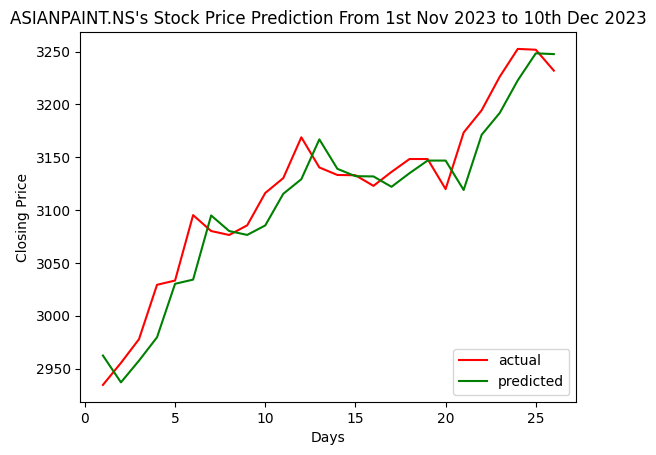

In [21]:
plt.title(f"{ticker}'s Stock Price Prediction From 1st Nov 2023 to 10th Dec 2023")
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(days,future_data, label = 'actual', color='red')
plt.plot(days,future_predictions, label = 'predicted', color='green')
plt.legend(loc='lower right')
plt.show()

In [22]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [23]:
controls_actual = get_control_vector(future_data)
amount_actual = buy_and_sell_bot(future_data, controls_actual)

In [24]:
controls_pred= get_control_vector(future_predictions)
amount_pred = buy_and_sell_bot(future_predictions, controls_pred)

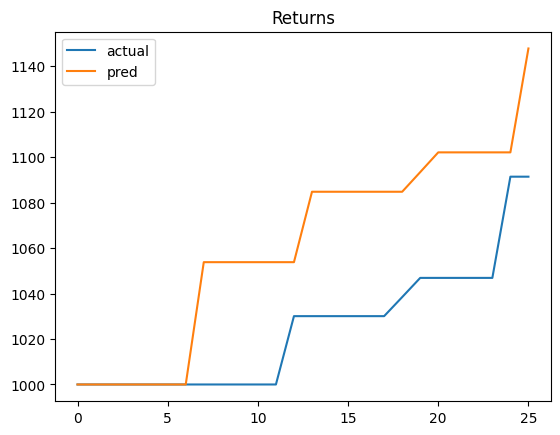

In [25]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()